In [207]:
import numpy as np
import random

path = [] # the final result list
dim = 10
p = 0.1
maze = np.zeros((dim, dim))
for i in range(dim):
    for j in range(dim):
        if(random.random() < p):
            maze[i][j] = 1
# maze

In [208]:
# 返回某一点的邻居点
def neighbor(o):
    t = ()
    x, y, step = o
    if x > 0:
        t += (x-1, y, True if maze[x-1][y] == 0 else False),
    if x < dim - 1:
        t += (x+1, y, True if maze[x+1][y] == 0 else False),
    if y > 0:
        t += (x, y-1, True if maze[x][y-1] == 0 else False),
    if y < dim - 1:
        t += (x, y+1, True if maze[x][y+1] == 0 else False),
    return t

print(neighbor((5, 5, 0)))

((4, 5, True), (6, 5, True), (5, 4, True), (5, 6, True))


In [209]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def draw_maze():
    fig, ax = plt.subplots()
    for i in range(np.shape(maze)[0]):
        for j in range(np.shape(maze)[1]):
            x = i*10 + 1
            y = j*10 + 1
            h = 9
            w = 9
            cl = '#cc6600' if maze[i][j] == 1 else '#F0EEEE'
            rect = mpatches.Rectangle([x, y], w, h, color=cl)
            ax.add_patch(rect)

    plt.axis([0, dim*10 + 1, 0, dim*10 + 1])
    fig.set_size_inches(6, 6)
    plt.show()

In [210]:
def draw_maze_with_path():
    fig, ax = plt.subplots()
    for i in range(np.shape(maze)[0]):
        for j in range(np.shape(maze)[1]):
            x = i*10 + 1
            y = j*10 + 1
            h = 9
            w = 9
            cl = '#cc6600' if maze[i][j] == 1 else '#F0EEEE'
            if (i, j) in path:
                cl = 'green'
            rect = mpatches.Rectangle([x, y], w, h, color=cl)
            ax.add_patch(rect)

    plt.axis([0, dim*10 + 1, 0, dim*10 + 1])
    fig.set_size_inches(6, 6)
    plt.show()

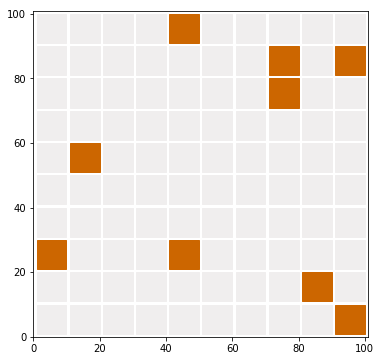

In [211]:
draw_maze()

In [212]:
# 初始化工作
path_stack = []
path_stack.append((0, 0, -1))
visited = [(0, 0)]
all_path = [(0, 0, 0)]
dest = (9, 9)

In [213]:
# BFS 算法
front, rear = 0, 1
is_end = False
while front != rear:
    for nx, ny, nt in neighbor(path_stack[front]):
        if (nt is True) and (nx, ny) not in visited:
            # print('append')
            if (nx, ny) == dest:
                print('get to the dest:',front)
                # print(path_stack)
                path.append((nx, ny))
                temp_parent = front
                while temp_parent != -1:
                    node_x, node_y, node_p = path_stack[temp_parent]
                    path.append((node_x, node_y))
                    temp_parent = node_p
                is_end = True
                break
            path_stack.append((nx, ny, front))
            visited.append((nx, ny))
            rear += 1
    if is_end:
        break
    front += 1

get to the dest: 89


In [214]:
path

[(9, 9),
 (8, 9),
 (8, 8),
 (8, 7),
 (8, 6),
 (8, 5),
 (8, 4),
 (8, 3),
 (8, 2),
 (7, 2),
 (7, 1),
 (7, 0),
 (6, 0),
 (5, 0),
 (4, 0),
 (3, 0),
 (2, 0),
 (1, 0),
 (0, 0)]

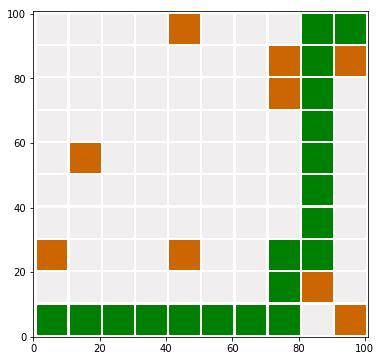

In [215]:
draw_maze_with_path()

In [216]:
len(visited)

90